# Figure 2: plots (data processing)

In this notebook we collect all the plots corresponding to the Figure 1 of the Variational Waveguide paper.

In [1]:
import pennylane as qml
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from pennylane import numpy as np
from scipy.sparse.linalg import eigsh
from openfermion.linalg import get_ground_state
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 120
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

We need to define some functions first: the Hamiltonian whose ground state we aim to find. The different circuits used throughout the article, written using Pennylane, will be loaded later.

In [2]:
# DEFINITION OF FUNCTIONS

def Ising_Hamiltonian_qml(J,g,N):
    '''
    Ising Hamiltonian with a transverse field (pennylane notation):
    H = J * sum_{i,j} Z^i Z^(i+1) + g * sum_i X^i
    ...

    Parameters
    -------
    J : float
        Strenght of the interaction.
    g : float
        Strenght of the transverse magnetic field.
    '''
    
    H = g*qml.PauliZ(N-1) 
    for i in range(0,N-1):
        H = H+ g*qml.PauliZ(i)+J*qml.PauliX(i)@qml.PauliX(i+1)
    #H = H + J*qml.PauliX(N-1)@qml.PauliX(0)

    return H

## Loading the data

First we load the data (calculated somehow and then stored local). Note that we load it grouped by number of qubits and number of layers.

In [4]:
import pickle

params_history_list = []
energy_history_list = []

Ns = [2*i for i in range(4,8+1)]
layers = [8,10,12,7,8]
#ms = [6,25,7,5]
ms = []
for N in Ns:
    ms.append(5*N)
max_iter = 1000

Ns = [8]
ms = [40]

path = '/home/ctabares/variational_long_range-main/paper/data/figure1_def/figure1/'
names = ['params_history_list','energy_history_list']
#names = ['params_history_list','energy_history_list',
#        'final_energy_list','final_params_list','final_iterations_list']
gates = ['global_adiab','brick-cnot_adiab_finrot','brick-cz_adiab_finrot','hea-cnot_adiab','hea-cz_adiab','HVA_adiab','global_all-to-all_adiab']
#gates = ['global_adiab','brick-cnot_adiab_finrot','brick-cz_adiab_finrot']
values = [params_history_list,energy_history_list]

k=0
for N,m in zip(Ns,ms):
    
    params_history_list_qubits = []
    energy_history_list_qubits = []
    values_qubit = [params_history_list_qubits,energy_history_list_qubits]

    for layer in np.arange(1,layers[k]+1):    
        params_history_list_layer = []
        energy_history_list_layer = []
        values_layer = [params_history_list_layer,energy_history_list_layer]
        for gate in gates:
            full_name = gate+('_N={}_layers={}_parameters={}_max-iter={}.p'.format(N,layer,m,max_iter))
            for name,value in zip(names,values_layer):
                with open(path+name+'_'+full_name,'rb') as fp:
                    value.append(pickle.load(fp))

        for value_layer,value_tot in zip(values_layer,values_qubit):
            value_tot.append(value_layer)
    
    k+=1

    for value_qubit,value_tot in zip(values_qubit,values):
        value_tot.append(value_qubit)

    

KeyboardInterrupt: 

In [43]:
len(params_history_list)

50

In [74]:
import pickle

params_history_list = []
energy_history_list = []
grad_list_history = []
final_energy_list = []
final_params_list = []
final_iterations_list = []

N = 16
layers = [i for i in range(1,int(10)+1)]
#ms = [6,25,7,5]
ms=[5*N for _ in range(1,N+1)]
max_iter = 1000

path = '/home/ctabares/variational_long_range-main/paper/data/figure1_def/figure1/'
names = ['params_history_list','energy_history_list']
#gates = ['global_adiab','brick-cnot_adiab_finrot','brick-cz_adiab_finrot','hea-cnot_adiab','hea-cz_adiab','HVA_adiab','global_all-to-all_adiab']
gates = ['global_adiab','brick-cz_adiab_finrot','hea-cz_adiab','HVA_adiab','global_all-to-all_adiab']

values = [params_history_list,energy_history_list]

for layer,m in zip(layers,ms):
    params_history_list_layer = []
    energy_history_list_layer = []

    values_layer = [params_history_list_layer,energy_history_list_layer]
    for gate in gates:
        
        full_name = gate+('_N={}_layers={}_parameters={}_max-iter={}.p'.format(N,layer,m,max_iter))
        for name,value in zip(names,values_layer):
            with open(path+name+'_'+full_name,'rb') as fp:
                value.append(pickle.load(fp))

    #for value in values_layer[-1]:
        #value[0] = [item for sublist in value[0] for item in sublist]

    for value_layer,value_tot in zip(values_layer,values):
        value_tot.append(value_layer)
    

In [75]:
energy_vec_global_layers = []
energy_vec_global_all_to_all_layers = []
energy_vec_hva_layers = []
energy_vec_brick_cnot_layers = []
energy_vec_brick_cz_layers = []
energy_vec_hea_cnot_layers = []
energy_vec_hea_cz_layers = []

pos_vec_global_layers = []
params_opt_global_layers = []
pos_vec_global_all_to_all_layers = []
params_opt_global_all_to_all_layers = []
pos_vec_hva_layers = []
params_opt_hva_layers = []
pos_vec_brick_cnot_layers = []
params_opt_brick_cnot_layers = []
pos_vec_brick_cz_layers = []
params_opt_brick_cz_layers = []
pos_vec_hea_cnot_layers = []
params_opt_hea_cnot_layers = []
pos_vec_hea_cz_layers = []
params_opt_hea_cz_layers = []
j=0


for layer in np.arange(1,int(10)+1):
    
    energy_vec_global = []
    energy_vec_global_all_to_all = []
    energy_vec_hva = []
    #energy_vec_brick_cnot = []
    energy_vec_brick_cz = []
    #energy_vec_hea_cnot = []
    energy_vec_hea_cz = []
    
    pos_vec_global = []
    params_opt_global = []
    pos_vec_global_all_to_all = []
    params_opt_global_all_to_all = []
    pos_vec_hva = []
    params_opt_hva = []
    #pos_vec_brick_cnot = []
    #params_opt_brick_cnot = []
    pos_vec_brick_cz = []
    params_opt_brick_cz = []    
    #pos_vec_hea_cnot = []
    #params_opt_hea_cnot = []
    pos_vec_hea_cz = []
    params_opt_hea_cz = []

    i=-1
    '''
    energy_vec_global.append(float(min(energy_history_list[j][0][i][0])))
    energy_vec_global_all_to_all.append(float(min(energy_history_list[j][6][i][0])))
    energy_vec_hva.append(float(min(energy_history_list[j][5][i][0])))
    energy_vec_brick_cnot.append(float(min(energy_history_list[j][1][i][0])))
    energy_vec_brick_cz.append(float(min(energy_history_list[j][2][i][0])))
    energy_vec_hea_cnot.append(float(min(energy_history_list[j][3][i][0])))
    energy_vec_hea_cz.append(float(min(energy_history_list[j][4][i][0])))
    

    pos_vec_global.append(energy_history_list[j][0][i][0].index(min(energy_history_list[j][0][i][0])))
    pos_vec_global_all_to_all.append(energy_history_list[j][6][i][0].index(min(energy_history_list[j][6][i][0])))
    pos_vec_hva.append(energy_history_list[j][5][i][0].index(min(energy_history_list[j][5][i][0])))
    pos_vec_brick_cnot.append(energy_history_list[j][1][i][0].index(min(energy_history_list[j][1][i][0])))
    pos_vec_brick_cz.append(energy_history_list[j][2][i][0].index(min(energy_history_list[j][2][i][0])))
    pos_vec_hea_cnot.append(energy_history_list[j][3][i][0].index(min(energy_history_list[j][3][i][0])))
    pos_vec_hea_cz.append(energy_history_list[j][4][i][0].index(min(energy_history_list[j][4][i][0])))


    params_opt_global.append(params_history_list[j][0][i][0][pos_vec_global[i]])
    params_opt_global_all_to_all.append(params_history_list[j][6][i][0][pos_vec_global_all_to_all[i]])
    params_opt_hva.append(params_history_list[j][5][i][0][pos_vec_hva[i]])
    #params_opt_brick_cnot.append(params_history_list[j][1][i][0][pos_vec_brick_cnot[i]])
    params_opt_brick_cz.append(params_history_list[j][2][i][0][pos_vec_brick_cz[i]])
    #params_opt_hea_cnot.append(params_history_list[j][3][i][0][pos_vec_hea_cnot[i]])
    params_opt_hea_cz.append(params_history_list[j][4][i][0][pos_vec_hea_cz[i]])
    '''
    
    # WITHOUT CNOTS

    energy_vec_global.append(float(min(energy_history_list[j][0][i][0])))
    energy_vec_global_all_to_all.append(float(min(energy_history_list[j][4][i][0])))
    energy_vec_hva.append(float(min(energy_history_list[j][3][i][0])))
    #energy_vec_brick_cnot.append(float(min(energy_history_list[j][1][i][0])))
    energy_vec_brick_cz.append(float(min(energy_history_list[j][1][i][0])))
    #energy_vec_hea_cnot.append(float(min(energy_history_list[j][3][i][0])))
    energy_vec_hea_cz.append(float(min(energy_history_list[j][2][i][0])))


    pos_vec_global.append(energy_history_list[j][0][i][0].index(min(energy_history_list[j][0][i][0])))
    pos_vec_global_all_to_all.append(energy_history_list[j][4][i][0].index(min(energy_history_list[j][4][i][0])))
    pos_vec_hva.append(energy_history_list[j][3][i][0].index(min(energy_history_list[j][3][i][0])))
    pos_vec_brick_cz.append(energy_history_list[j][1][i][0].index(min(energy_history_list[j][1][i][0])))
    pos_vec_hea_cz.append(energy_history_list[j][2][i][0].index(min(energy_history_list[j][2][i][0])))


    params_opt_global.append(params_history_list[j][0][i][0][pos_vec_global[i]])
    params_opt_global_all_to_all.append(params_history_list[j][4][i][0][pos_vec_global_all_to_all[i]])
    params_opt_hva.append(params_history_list[j][3][i][0][pos_vec_hva[i]])
    #params_opt_brick_cnot.append(params_history_list[j][1][i][0][pos_vec_brick_cnot[i]])
    params_opt_brick_cz.append(params_history_list[j][1][i][0][pos_vec_brick_cz[i]])
    #params_opt_hea_cnot.append(params_history_list[j][3][i][0][pos_vec_hea_cnot[i]])
    params_opt_hea_cz.append(params_history_list[j][2][i][0][pos_vec_hea_cz[i]])
    
    j+=1
    
    energy_vec_global_layers.append(energy_vec_global)    
    energy_vec_global_all_to_all_layers.append(energy_vec_global_all_to_all)    
    energy_vec_hva_layers.append(energy_vec_hva)
    #energy_vec_brick_cnot_layers.append(energy_vec_brick_cnot)
    energy_vec_brick_cz_layers.append(energy_vec_brick_cz)
    #energy_vec_hea_cnot_layers.append(energy_vec_hea_cnot)
    energy_vec_hea_cz_layers.append(energy_vec_hea_cz)
    
    pos_vec_global_layers.append(pos_vec_global)
    params_opt_global_layers.append(params_opt_global)    
    pos_vec_global_all_to_all_layers.append(pos_vec_global_all_to_all)
    params_opt_global_all_to_all_layers.append(params_opt_global_all_to_all)  
    pos_vec_hva_layers.append(pos_vec_hva_layers)
    params_opt_hva_layers.append(params_opt_hva)
    #pos_vec_brick_cnot_layers.append(pos_vec_brick_cnot)
    #params_opt_brick_cnot_layers.append(params_opt_brick_cnot)
    pos_vec_brick_cz_layers.append(pos_vec_brick_cz)
    params_opt_brick_cz_layers.append(params_opt_brick_cz)
    #pos_vec_hea_cnot_layers.append(pos_vec_hea_cnot)
    #params_opt_hea_cnot_layers.append(params_opt_hea_cnot)
    pos_vec_hea_cz_layers.append(pos_vec_hea_cz)
    params_opt_hea_cz_layers.append(params_opt_hea_cz)

In [ ]:
energy_history_list

In [76]:
fidelity_global_layers = []
fidelity_global_all_to_all_layers = []
fidelity_hva_layers = []
fidelity_brick_cnot_layers = []
fidelity_brick_cz_layers = []
fidelity_hea_cnot_layers = []
fidelity_hea_cz_layers = []


# OPTIMIZATION: definition of the grid


gamma_list = -np.linspace(0.1,1.0,5*N)

eigenenergies_exact = []
eigenstates_exact = []
max_energy_exact = []

g=1.0
i=0
m=5*N


gamma_pre =gamma_list[0:m][-1]
gamma_in=gamma_pre
H =Ising_Hamiltonian_qml(float(gamma_in),g,N)
H_mat = qml.utils.sparse_hamiltonian(H).real
eigenvalue,eigenstate = get_ground_state(H_mat)
E_exac = float(eigenvalue)
eigenenergies_exact.append(E_exac)
eigenstates_exact.append(eigenstate)
H_max = -1*qml.utils.sparse_hamiltonian(H).real
eigenvalue_max,eigenstate_max = get_ground_state(H_max)
E_max = float(eigenvalue_max)
max_energy_exact.append(-E_max)
for layer in np.arange(1,int(10)+1):
    fidelity_global = []
    fidelity_global_all_to_all = []
    fidelity_hva = []
    fidelity_hea_cnot = []
    fidelity_hea_cz = []
    fidelity_brick_cnot = []
    fidelity_brick_cz = []
    i=-1
    fidelity_global.append(np.abs(energy_vec_global_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_global_all_to_all.append(np.abs(energy_vec_global_all_to_all_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_hva.append(np.abs(energy_vec_hva_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    #fidelity_hea_cnot.append(np.abs(energy_vec_hea_cnot_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_hea_cz.append(np.abs(energy_vec_hea_cz_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    #fidelity_brick_cnot.append(np.abs(energy_vec_brick_cnot_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_brick_cz.append(np.abs(energy_vec_brick_cz_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))

    fidelity_global_layers.append(fidelity_global)
    fidelity_global_all_to_all_layers.append(fidelity_global_all_to_all)
    fidelity_hva_layers.append(fidelity_hva)
    #fidelity_hea_cnot_layers.append(fidelity_hea_cnot)
    fidelity_brick_cz_layers.append(fidelity_brick_cz)
    #fidelity_brick_cnot_layers.append(fidelity_brick_cnot)
    fidelity_hea_cz_layers.append(fidelity_hea_cz)

final_energy_global = []
final_energy_global_all_to_all = []
final_energy_hva = []
final_energy_hea_cnot = []
final_energy_hea_cz = []
final_energy_brick_cnot = []
final_energy_brick_cz = []

for i in range(int(10)):
    final_energy_global.append(fidelity_global_layers[i][-1])
    final_energy_global_all_to_all.append(fidelity_global_all_to_all_layers[i][-1])
    final_energy_hva.append(fidelity_hva_layers[i][-1])
    #final_energy_hea_cnot.append(fidelity_hea_cnot_layers[i][-1])
    final_energy_hea_cz.append(fidelity_hea_cz_layers[i][-1])
    #final_energy_brick_cnot.append(fidelity_brick_cnot_layers[i][-1])
    final_energy_brick_cz.append(fidelity_brick_cz_layers[i][-1])

In [47]:
final_energies = [final_energy_global,final_energy_brick_cnot,final_energy_brick_cz,
                final_energy_hea_cnot,final_energy_hea_cz,final_energy_hva,final_energy_global_all_to_all]

In [48]:
import seaborn as sns
a=plt.cm.plasma(np.linspace(0,1,M))
b=sns.color_palette("husl",as_cmap=True)(np.linspace(0,1,M))
print(a)
print(b)


[[5.03830e-02 2.98030e-02 5.27975e-01 1.00000e+00]
 [4.17642e-01 5.64000e-04 6.58390e-01 1.00000e+00]
 [6.92840e-01 1.65141e-01 5.64522e-01 1.00000e+00]
 [8.81443e-01 3.92529e-01 3.83229e-01 1.00000e+00]
 [9.88260e-01 6.52325e-01 2.11364e-01 1.00000e+00]
 [9.40015e-01 9.75158e-01 1.31326e-01 1.00000e+00]]
[[0.96779756 0.44127456 0.53581032 1.        ]
 [0.68170288 0.61471411 0.1940632  1.        ]
 [0.20106375 0.69105936 0.47562553 1.        ]
 [0.21951081 0.6629899  0.76953579 1.        ]
 [0.79080652 0.48254293 0.95797631 1.        ]
 [0.96760542 0.43984146 0.54795299 1.        ]]


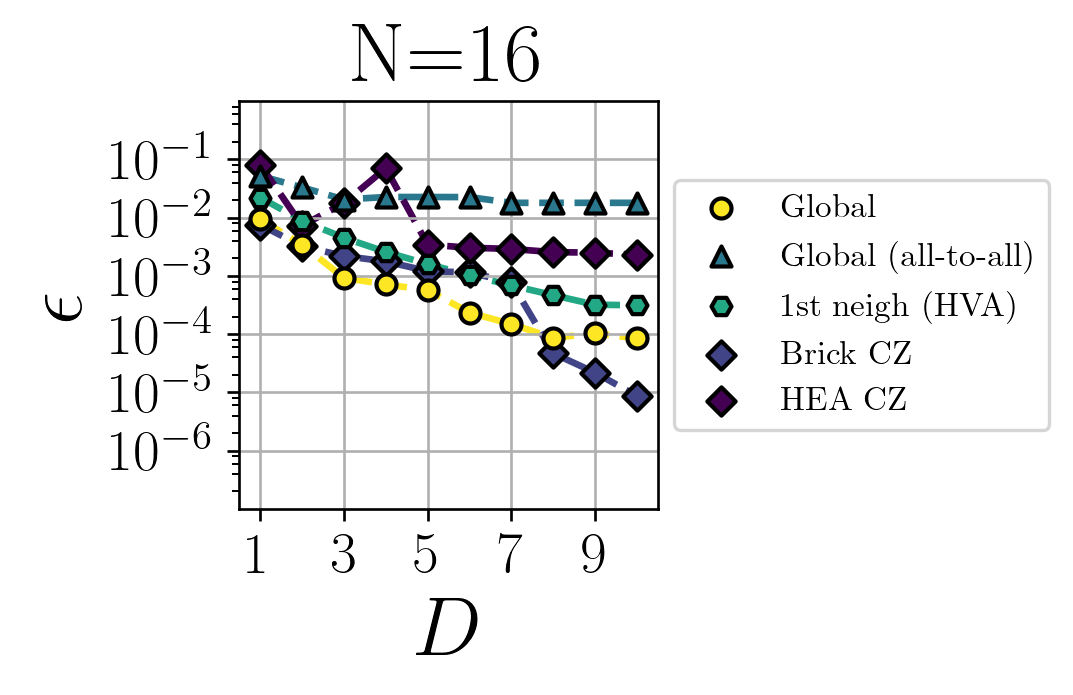

In [77]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
#colors = sns.color_palette("tab10",as_cmap=True)(np.linspace(0,1,M))
total_layers = np.arange(1,int(10)+1)
'''
ax.plot(xi_list[0:m],fidelity_hva,label=r'HVA',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cnot,label=r'CNOT gates',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cz,label=r'CZ gates',linewidth=2)
'''
'''
ax.scatter(total_layers,final_energy_hva,label=r'HVA',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1])
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cnot,label=r'CNOT',linewidth=1.25,marker='d',edgecolor='black', facecolor=colors[0])
ax.plot(total_layers,final_energy_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cz,label=r'CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1])
ax.plot(total_layers,final_energy_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
'''

ax.scatter(total_layers,final_energy_global,label=r'Global',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1],zorder=10)
ax.plot(total_layers,final_energy_global,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_global_all_to_all,label=r'Global (all-to-all)',linewidth=1.25,marker='^',edgecolor='black', facecolor=colors[-4],zorder=10)
ax.plot(total_layers,final_energy_global_all_to_all,linewidth=2,color=colors[-4],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_hva,label=r'1st neigh (HVA)',linewidth=1.25,marker='H',edgecolor='black', facecolor=colors[-3],zorder=10)
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-3],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_energy_brick_cnot,label=r'Brick CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[1],zorder=2)
#ax.plot(total_layers,final_energy_brick_cnot,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_brick_cz,label=r'Brick CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_energy_brick_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_energy_hea_cnot,label=r'HEA CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
#ax.plot(total_layers,final_energy_hea_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_hea_cz,label=r'HEA CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_energy_hea_cz,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)


#ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
#ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
#ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
ax.set_yscale('log')



#ax.set_xlim([3.2,0.2])
ax.set_title(r'N={}'.format(N),fontsize=25) 
ax.set_xlabel(r'$D$',fontsize=25)
ax.set_ylabel(r"$\epsilon$",fontsize=25)
ax.tick_params(axis='both', labelsize=17.5)
#restore_minor_ticks_log_plot(ax)
from matplotlib import ticker as mticker
ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=(.2, .4, .6, .8)))
ax.set_yticks([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6])
ax.set_yticklabels([r'$10^{-1}$',r'$10^{-2}$',r'$10^{-3}$',r'$10^{-4}$',r'$10^{-5}$',r'$10^{-6}$'])
ax.set_xticks([1,3,5,7,9,11])
ax.set_xticklabels([r'$1$',r'$3$',r'$5$',r'$7$',r'$9$',r'$11$'])
ax.set_xlim([0.5,int(10)+0.5])
ax.set_ylim([1e-7,1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
#plt.setp(ax, ylim=ax1.get_ylim())
plt.grid()


plt.savefig("figures/figure1/final_res_energy_N={:}_SM.pdf".format(N),bbox_inches='tight',dpi=600)

In [78]:
from jax.config import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp

dev = qml.device('lightning.qubit', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_global(params,layers):
    thetas = params[0:layers]
    xi = params[layers:2*layers]
    gamma = params[2*layers:3*layers]
    for i in range(N):
        qml.PauliX(wires=[i])
    for layer in range(layers):
        for i in range(N):
            for j in range(i+1,N):
                #qml.IsingXX(gamma[layer]*jnp.exp(-jnp.abs(i-j)/(xi[layer]**2)),wires=[i,j])
                qml.IsingXX(gamma[layer]*jnp.exp(-(jnp.abs(i-j)/jnp.abs(xi[layer]))),wires=[i,j])
        for i in range(N):
            qml.RZ(thetas[layer],i)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('lightning.qubit', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_global_all_to_all(params,layers):
    thetas = params[0:layers]
    gamma = params[layers:2*layers]
    for i in range(N):
        qml.PauliX(wires=[i])
    for layer in range(layers):
        for i in range(N):
            for j in range(i+1,N):
                #qml.IsingXX(gamma[layer]*jnp.exp(-jnp.abs(i-j)/(xi[layer]**2)),wires=[i,j])
                qml.IsingXX(gamma[layer],wires=[i,j])
        for i in range(N):
            qml.RZ(thetas[layer],i)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('lightning.qubit', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hva(params,layers):
    thetas = params[0:layers]
    gamma = params[1*layers:2*layers]
    for i in range(N):
        qml.PauliX(wires=[i])
    for layer in range(layers):
        for i in range(N-1):
            j=i+1
            qml.IsingXX(gamma[layer],wires=[i,j])
        for i in range(N):
            qml.RZ(thetas[layer],i)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('lightning.qubit',wires=N)
@qml.qnode(dev,interface='jax')
def circuit_brick_cnot(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RY(params[2*layer*N+i],i)
        for i in range(int(N/2)):
            qml.CNOT(wires=[2*i,2*i+1])
        for i in range(N):
            qml.RY(params[2*layer*N+N+i],i)
        for i in range(1,int(N/2)):
            qml.CNOT(wires=[2*i-1,2*i])
        qml.CNOT(wires=[N-1,0])
        qml.Barrier(range(0,N))
    for i in range(N):
        qml.RY(params[2*N*layers+i],i)
    qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('lightning.qubit', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_brick_cz(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RY(params[2*layer*N+i],i)
        for i in range(int(N/2)):
            qml.CZ(wires=[2*i,2*i+1])
        for i in range(N):
            qml.RY(params[2*layer*N+N+i],i)
        for i in range(1,int(N/2)):
            qml.CZ(wires=[2*i-1,2*i])
        qml.CZ(wires=[N-1,0])
        qml.Barrier(range(0,N))
    for i in range(N):
        qml.RY(params[2*N*layers+i],i)
    qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('lightning.qubit', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hea_cnot(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RZ(params[layer*N+i],i)
            qml.RX(params[layers*N+layer*N+i],i)
            qml.RZ(params[2*layers*N+layer*N+i],i)
        for i in range(N-1):
            qml.CNOT(wires=[i,i+1])
        qml.CNOT(wires=[N-1,0])
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('lightning.qubit', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hea_cz(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RZ(params[layer*N+i],i)
            qml.RX(params[layers*N+layer*N+i],i)
            qml.RZ(params[2*layers*N+layer*N+i],i)
        for i in range(N-1):
            qml.CZ(wires=[i,i+1])
        qml.CZ(wires=[N-1,0])
        qml.Barrier(range(0,N))
    return qml.state()

In [79]:
state_fidelity_global_layers = []
state_fidelity_global_all_to_all_layers = []
state_fidelity_hva_layers = []
state_fidelity_hea_cnot_layers = []
state_fidelity_hea_cz_layers = []
state_fidelity_brick_cnot_layers = []
state_fidelity_brick_cz_layers = []


for layer in np.arange(1,int(int(10))+1):

    state_fidelity_global = []
    state_fidelity_global_all_to_all = []
    state_fidelity_hva = []
    state_fidelity_hea_cnot = []
    state_fidelity_hea_cz = []
    state_fidelity_brick_cnot = []
    state_fidelity_brick_cz = []
    i=-1
        
    eigenvalue=eigenenergies_exact[i]
    eigenstate=eigenstates_exact[i]

    par_global = params_opt_global_layers[layer-1][i]
    numeric_global = circuit_global(par_global,layer)
    state_fidelity_global.append(1-np.abs(np.vdot(eigenstate,numeric_global)))

    par_global_all_to_all = params_opt_global_all_to_all_layers[layer-1][i]
    numeric_global_all_to_all = circuit_global_all_to_all(par_global_all_to_all,layer)
    state_fidelity_global_all_to_all.append(1-np.abs(np.vdot(eigenstate,numeric_global_all_to_all)))

    par_hva = params_opt_hva_layers[layer-1][i]
    numeric_hva = circuit_hva(par_hva,layer)
    state_fidelity_hva.append(1-np.abs(np.vdot(eigenstate,numeric_hva)))
    '''
    par_hea_cnot = params_opt_hea_cnot_layers[layer-1][i]
    numeric_hea_cnot = circuit_hea_cnot(par_hea_cnot,layer)
    state_fidelity_hea_cnot.append(1-np.abs(np.vdot(eigenstate,numeric_hea_cnot)))

    par_brick_cnot = params_opt_brick_cnot_layers[layer-1][i]
    numeric_brick_cnot = circuit_brick_cnot(par_brick_cnot,layer)
    state_fidelity_brick_cnot.append(1-np.abs(np.vdot(eigenstate,numeric_brick_cnot)))
    '''
    par_hea_cz = params_opt_hea_cz_layers[layer-1][i]
    numeric_hea_cz = circuit_hea_cz(par_hea_cz,layer)
    state_fidelity_hea_cz.append(1-np.abs(np.vdot(eigenstate,numeric_hea_cz)))

    par_brick_cz = params_opt_brick_cz_layers[layer-1][i]
    numeric_brick_cz = circuit_brick_cz(par_brick_cz,layer)
    state_fidelity_brick_cz.append(1-np.abs(np.vdot(eigenstate,numeric_brick_cz)))

    state_fidelity_global_layers.append(state_fidelity_global)
    state_fidelity_global_all_to_all_layers.append(state_fidelity_global_all_to_all)
    state_fidelity_hva_layers.append(state_fidelity_hva)
    #state_fidelity_hea_cnot_layers.append(state_fidelity_hea_cnot)
    state_fidelity_hea_cz_layers.append(state_fidelity_hea_cz)
    #state_fidelity_brick_cnot_layers.append(state_fidelity_brick_cnot)
    state_fidelity_brick_cz_layers.append(state_fidelity_brick_cz)

final_state_global = []
final_state_global_all_to_all = []
final_state_hva = []
final_state_hea_cnot = []
final_state_hea_cz = []
final_state_brick_cnot = []
final_state_brick_cz = []

for i in range(int(int(10))):
    final_state_global.append(state_fidelity_global_layers[i][-1])
    final_state_global_all_to_all.append(state_fidelity_global_all_to_all_layers[i][-1])
    final_state_hva.append(state_fidelity_hva_layers[i][-1])
    #final_state_hea_cnot.append(state_fidelity_hea_cnot_layers[i][-1])
    final_state_hea_cz.append(state_fidelity_hea_cz_layers[i][-1])
    #final_state_brick_cnot.append(state_fidelity_brick_cnot_layers[i][-1])
    final_state_brick_cz.append(state_fidelity_brick_cz_layers[i][-1])

In [52]:
final_states = [final_state_global,final_state_brick_cnot,final_state_brick_cz,
                final_state_hea_cnot,final_state_hea_cz,final_state_hva,final_state_global_all_to_all]

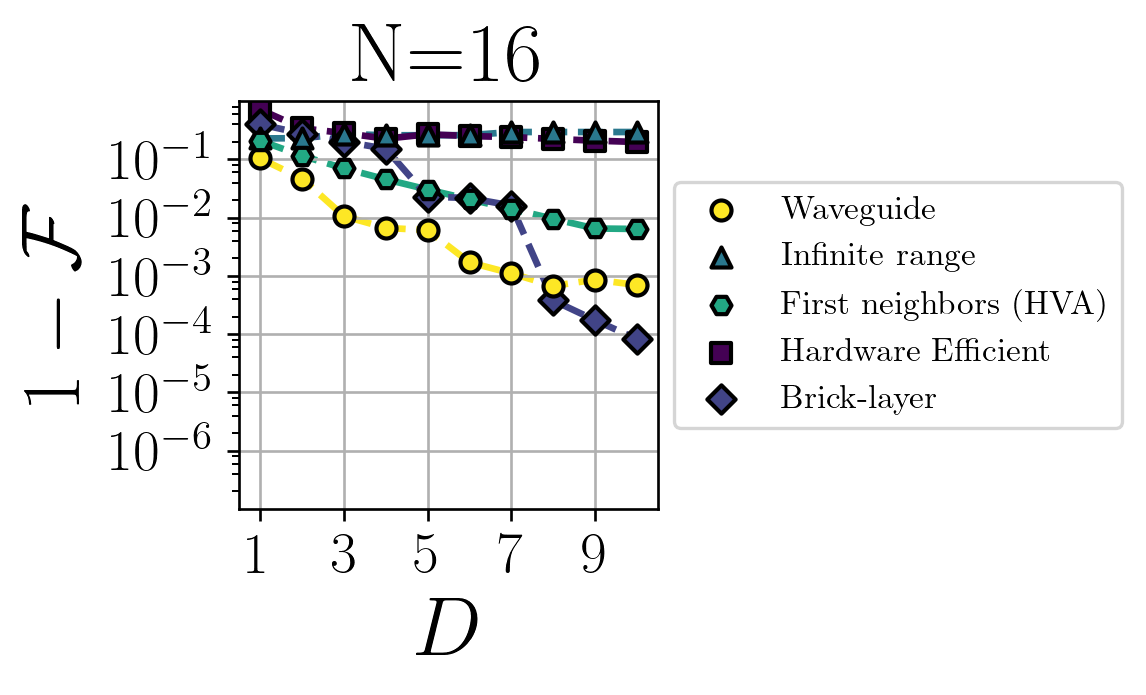

In [80]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_layers = np.arange(1,int(int(10))+1)
'''
ax.plot(xi_list[0:m],fidelity_hva,label=r'HVA',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cnot,label=r'CNOT gates',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cz,label=r'CZ gates',linewidth=2)
'''
'''
ax.scatter(total_layers,final_energy_hva,label=r'HVA',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1])
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cnot,label=r'CNOT',linewidth=1.25,marker='d',edgecolor='black', facecolor=colors[0])
ax.plot(total_layers,final_energy_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cz,label=r'CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1])
ax.plot(total_layers,final_energy_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
'''
plt.grid()
ax.scatter(total_layers,final_state_global,label=r'Waveguide',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1],zorder=10)
ax.plot(total_layers,final_state_global,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_global_all_to_all,label=r'Infinite range',linewidth=1.25,marker='^',edgecolor='black', facecolor=colors[-4],zorder=10)
ax.plot(total_layers,final_state_global_all_to_all,linewidth=2,color=colors[-4],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hva,label=r'First neighbors (HVA)',linewidth=1.25,marker='H',edgecolor='black', facecolor=colors[-3],zorder=10)
ax.plot(total_layers,final_state_hva,linewidth=2,color=colors[-3],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_state_hea_cnot,label=r'HEA CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
#ax.plot(total_layers,final_state_hea_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hea_cz,label=r'Hardware Efficient',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_state_hea_cz,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_state_brick_cnot,label=r'Brick CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[1],zorder=2)
#ax.plot(total_layers,final_state_brick_cnot,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_brick_cz,label=r'Brick-layer',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_state_brick_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.set_yscale('log')



#ax.set_xlim([3.2,0.2])
ax.set_title(r'N={}'.format(N),fontsize=25)
ax.set_xlabel(r'$D$',fontsize=25)
ax.set_ylabel(r"$1-\mathcal{F}$",fontsize=25)
ax.tick_params(axis='both', labelsize=17.5)
#restore_minor_ticks_log_plot(ax)
from matplotlib import ticker as mticker
ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=(.2, .4, .6, .8)))
ax.set_yticks([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6])
ax.set_yticklabels([r'$10^{-1}$',r'$10^{-2}$',r'$10^{-3}$',r'$10^{-4}$',r'$10^{-5}$',r'$10^{-6}$'])
ax.set_xticks([1,3,5,7,9,11])
ax.set_xticklabels([r'$1$',r'$3$',r'$5$',r'$7$',r'$9$',r'$11$'])
ax.set_xlim([0.5,int(10)+0.5])
ax.set_ylim([1e-7,1])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
#plt.setp(ax, ylim=ax1.get_ylim())

plt.savefig("figures/figure1/final_state_infidelity_N={:}_SM.pdf".format(N),bbox_inches='tight',dpi=600)

In [102]:
residual_energy_layers = {}
infidelity_layers = {}
for i,layer in enumerate(np.arange(1,int(2*N/2)+1)):
    residual_energy_gates = {}
    infidelity_gates = {}
    for j,gate in enumerate(gates):
        residual_energy_gates[f'{gate}']= final_energies[j][i]
        infidelity_gates[f'{gate}'] = final_states[j][i]
        print(f'gate={gate} for layer={layer}')
    residual_energy_layers[f'layers={layer}'] = residual_energy_gates
    infidelity_layers[f'layers={layer}'] = infidelity_gates
    

gate=global_adiab for layer=1
gate=brick-cnot_adiab_finrot for layer=1
gate=brick-cz_adiab_finrot for layer=1
gate=hea-cnot_adiab for layer=1
gate=hea-cz_adiab for layer=1
gate=HVA_adiab for layer=1
gate=global_all-to-all_adiab for layer=1
gate=global_adiab for layer=2
gate=brick-cnot_adiab_finrot for layer=2
gate=brick-cz_adiab_finrot for layer=2
gate=hea-cnot_adiab for layer=2
gate=hea-cz_adiab for layer=2
gate=HVA_adiab for layer=2
gate=global_all-to-all_adiab for layer=2
gate=global_adiab for layer=3
gate=brick-cnot_adiab_finrot for layer=3
gate=brick-cz_adiab_finrot for layer=3
gate=hea-cnot_adiab for layer=3
gate=hea-cz_adiab for layer=3
gate=HVA_adiab for layer=3
gate=global_all-to-all_adiab for layer=3
gate=global_adiab for layer=4
gate=brick-cnot_adiab_finrot for layer=4
gate=brick-cz_adiab_finrot for layer=4
gate=hea-cnot_adiab for layer=4
gate=hea-cz_adiab for layer=4
gate=HVA_adiab for layer=4
gate=global_all-to-all_adiab for layer=4
gate=global_adiab for layer=5
gate=brick

In [103]:
residual_energy_layers['layers=1']['global_adiab']

0.008573676206625764

In [104]:
#residual_energy_data = {}
#infidelity_data = {}

In [105]:
residual_energy_data[f'N={N}'] = residual_energy_layers
infidelity_data[f'N={N}'] = infidelity_layers

In [106]:
residual_energy_data[f'N=12']['layers=7']

{'global_adiab': 9.388979594742315e-05,
 'brick-cnot_adiab_finrot': 9.856282575862861e-05,
 'brick-cz_adiab_finrot': 2.126924179323594e-05,
 'hea-cnot_adiab': 0.11681222832836798,
 'hea-cz_adiab': 0.003183996984946302,
 'HVA_adiab': 0.0004416318813696393,
 'global_all-to-all_adiab': 0.020240274040166067}

In [107]:
import pickle

with open('/home/ctabares/variational_long_range-main/paper/residual_energy_dict_def.p', 'wb') as fp:
    pickle.dump(residual_energy_data, fp)

with open('/home/ctabares/variational_long_range-main/paper/state_infidelity_dict_def.p', 'wb') as fp:
    pickle.dump(infidelity_data, fp)

In [118]:
with open('./residual_energy_dict.p','rb') as fp:
    residual_energies = pickle.load(fp)

with open('./state_infidelity_dict.p','rb') as fp:
    state_infidelities = pickle.load(fp)

In [119]:
state_infidelities['N=8']['layers=8']

{'global_adiab': 5.639367763499159e-05,
 'brick-cnot_adiab_finrot': 6.700655688496315e-05,
 'brick-cz_adiab_finrot': 1.209377491906416e-05,
 'hea-cnot_adiab': 0.01761909856493593,
 'hea-cz_adiab': 0.006273374602214776,
 'HVA_adiab': 7.875138888668864e-06}

In [120]:
infidelity_data['N=10']['layers=5']

{'global_adiab': 0.0012711492641905853,
 'brick-cnot_adiab_finrot': 0.00041197475878718137,
 'brick-cz_adiab_finrot': 0.010941951027969576,
 'hea-cnot_adiab': 0.6426650270876533,
 'hea-cz_adiab': 0.17108676509636023,
 'HVA_adiab': 0.00787700729479901}

In [121]:
infidelity_data['N=12']['layers=12']

{'global_adiab': 0.00022607658557882715,
 'brick-cnot_adiab_finrot': 0.0010624088851125535,
 'brick-cz_adiab_finrot': 4.791882384747037e-05,
 'hea-cnot_adiab': 0.8803895279284228,
 'hea-cz_adiab': 0.008429478509663246,
 'HVA_adiab': 3.666470840535396e-05}

In [122]:
infidelity_data['N=14']['layers=7']

{'global_adiab': 0.0007066296521563986,
 'brick-cnot_adiab_finrot': 0.0009970307100152231,
 'brick-cz_adiab_finrot': 0.017236523251341285,
 'hea-cnot_adiab': 0.9999998727897316,
 'hea-cz_adiab': 0.22769170328514932,
 'HVA_adiab': 0.009157358204583188}

In [139]:
infidelity_data['N=16']['layers=4']['global_adiab']

0.010837448785015469